In [1]:
import pandas as pd

In [2]:
oil = pd.read_csv("../retail/oil.csv")

# Assignment 1: Simple Line Chart

Build a simple line plot for the oil series. Are there any interesting patterns here? 

What happened in 2014 to oil price?

In [3]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


<Axes: >

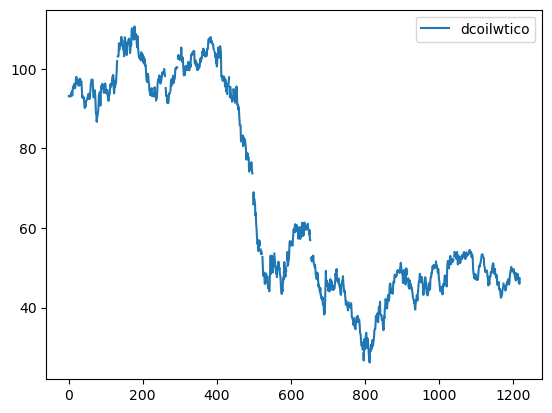

In [4]:
oil.plot()

<Axes: xlabel='date'>

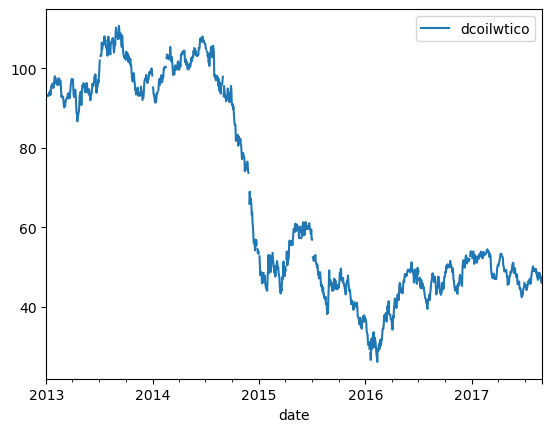

In [5]:
oil.astype({'date':'datetime64'}).set_index('date').plot()

# Assignment 2: Upgraded Line Chart


Give your chart a style, add axis titles, and change the color of the line to black. 

Consider converting the date column to datetime64.

Rename the column to a more intuitive name for the audience.

In [6]:
oil = oil.astype({'date':'datetime64'})

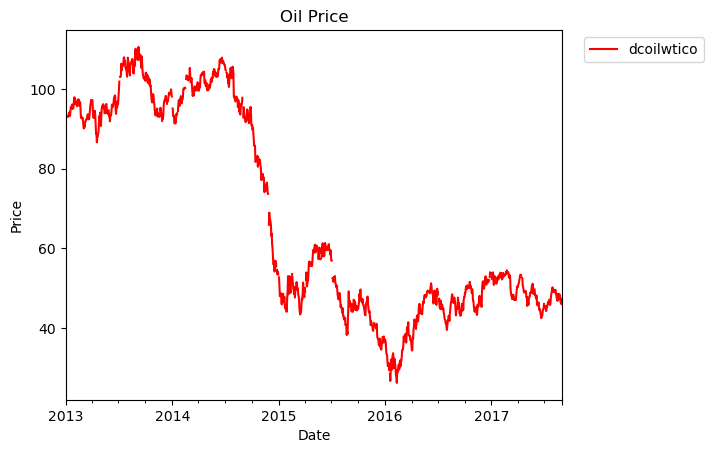

In [7]:
oil.set_index('date').plot(
    title = 'Oil Price',
    xlabel = 'Date',
    ylabel = 'Price',
    color = 'Red',
).legend(bbox_to_anchor = (1.3, 1))

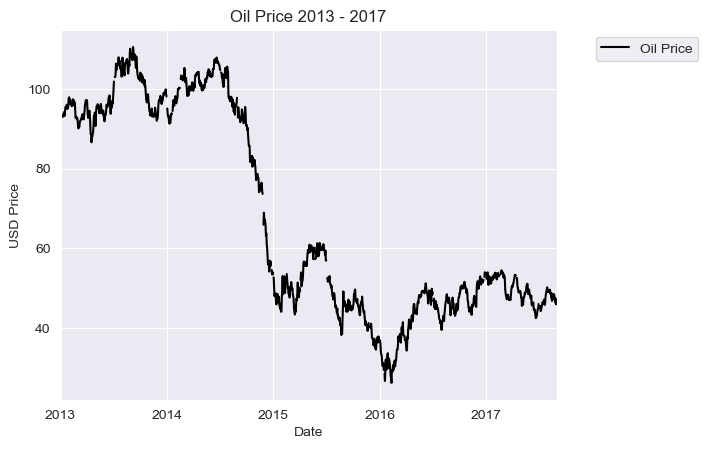

In [8]:
import seaborn as sns
sns.set_style('darkgrid')

oil.set_index('date').plot(
    title = 'Oil Price 2013 - 2017',
    xlabel = 'Date',
    ylabel = 'USD Price',
    color = 'Black',
).legend(['Oil Price'], bbox_to_anchor = (1.3, 1))

# Assignment 3: Subplots

Filter the transactions table to stores 1, 2, 3 and 4, then reshape it so each row is a date, and the columns of the table are the transactions for each store. 

Once you've done that, create a 2x2 line plot of transactions vs time, with one plot for each store.

Thanks!

In [9]:
transactions = pd.read_csv("../retail/transactions.csv")

In [10]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


array([[<Axes: title={'center': 'Store 1'}, xlabel='date'>,
        <Axes: title={'center': 'Store 2'}, xlabel='date'>],
       [<Axes: title={'center': 'Store 3'}, xlabel='date'>,
        <Axes: title={'center': 'Store 4'}, xlabel='date'>]], dtype=object)

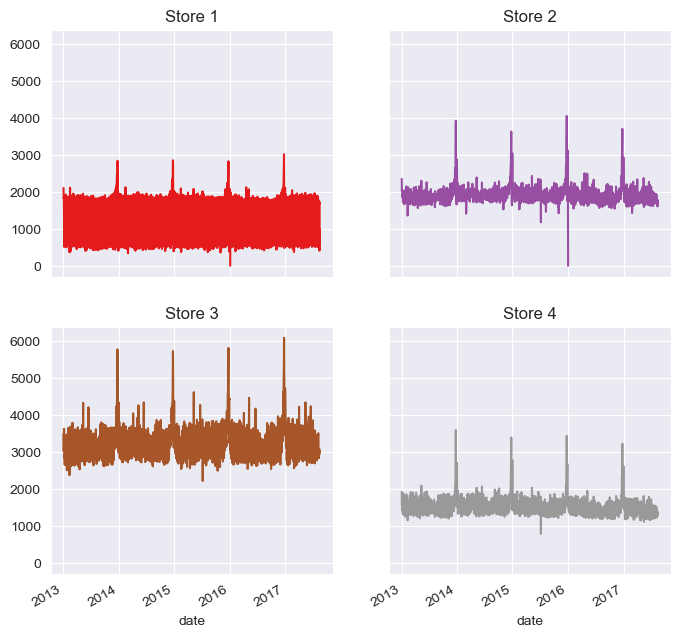

In [11]:
transactions.astype({'date':'datetime64'}).query(
    'store_nbr.isin([1,2,3,4])').pivot(
    index = 'date', 
    columns = 'store_nbr').droplevel(0, axis = 1).plot(
    title = ['Store 1', 'Store 2', 'Store 3', 'Store 4'],
    xlabel = 'date',
    layout = (2,2),
    legend = False,
    cmap = 'Set1',
    sharey = True,
    figsize = (8, 8),
    subplots = True)

# Assignment 4: Bar Charts

Create a sorted Bar chart of total sales by store number for stores 1, 2, 3 and 4.

Then create a horizontal stacked bar chart of sales by month, stacked by store number. 

In [12]:
# convert dates to datetime64
stores_1234 = transactions.query('store_nbr.isin([1, 2, 3, 4])')
stores_1234.index = stores_1234.index.astype("datetime64[ns]") 

stores_1234

,date,store_nbr,transactions
1970-01-01 00:00:00.000000001,2013-01-02,1,2111
1970-01-01 00:00:00.000000002,2013-01-02,2,2358
1970-01-01 00:00:00.000000003,2013-01-02,3,3487
1970-01-01 00:00:00.000000004,2013-01-02,4,1922
1970-01-01 00:00:00.000000047,2013-01-03,1,1833
...,...,...,...
1970-01-01 00:00:00.000083383,2017-08-14,4,1285
1970-01-01 00:00:00.000083434,2017-08-15,1,1693
1970-01-01 00:00:00.000083435,2017-08-15,2,1737
1970-01-01 00:00:00.000083436,2017-08-15,3,2956


C:\Users\bangg\AppData\Local\Temp\ipykernel_9344\106253513.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stores_1234.groupby('store_nbr').agg('sum').sort_values('transactions', ascending = False).plot.bar()


<Axes: xlabel='store_nbr'>

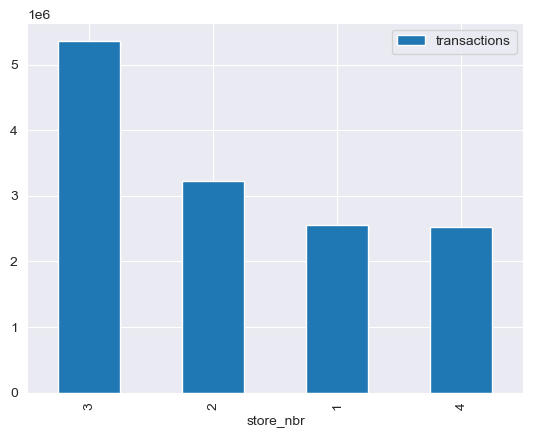

In [13]:
# stores_1234.index.month will allow you to groupby the month! You can also slice it.
stores_1234.groupby('store_nbr').agg('sum').sort_values('transactions', ascending = False).plot.bar()

In [14]:
stores_1234 = transactions.query('store_nbr.isin([1, 2, 3, 4])')
stores_1234 = stores_1234.set_index('date')
stores_1234.index = stores_1234.index.astype("datetime64[ns]") 

In [15]:
stores_1234_bar = stores_1234.groupby([stores_1234.index.month, 'store_nbr']).agg('sum')

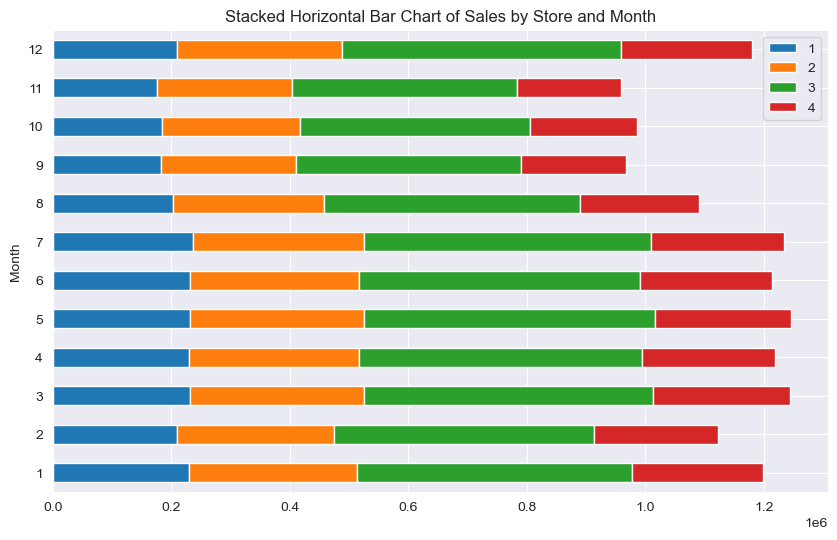

In [16]:
pivot_df = stores_1234_bar.reset_index().pivot(index='date', columns='store_nbr', values='transactions')
pivot_df.plot(kind='barh', 
              stacked=True, 
              figsize=(10, 6),
              title ='Stacked Horizontal Bar Chart of Sales by Store and Month',
              ylabel = 'Month'
             ).legend(title = None)

# Assignment 5: Scatterplots

Plot the relationship between store 2 and store 3 sales.

Color the dots by month.

Use `c=stores_1234.index.month` to do so.

In [30]:
stores_1234_2 = (transactions
                .loc[transactions["store_nbr"].isin([1, 2, 3, 4])]  #filter to stores 1, 2, 3, 4
                .pivot_table(index="date", columns="store_nbr") # Createa pivot table
                .droplevel(0, axis=1))  # drop outer layer of column axis
stores_1234_2.index = stores_1234_2.index.astype("datetime64[ns]") 


In [31]:
#stores_1234.index = stores_1234.index.month
stores_1234_2

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


<Axes: xlabel='2', ylabel='3'>

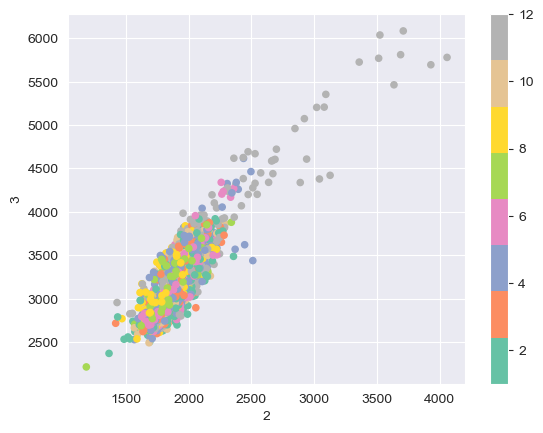

In [32]:
stores_1234_2.plot.scatter(x = 2, y = 3, c = stores_1234_2.index.month, colormap = 'Set2')

# Assignment 6: Histograms

Hi there,

Can you plot the distributions of sales for stores 2 and 3?

I want to see how often store 2 has sales similar to store 3, as well as if there are any outlier type days.

Thanks!


In [36]:
stores_1234_2.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


<Axes: ylabel='Frequency'>

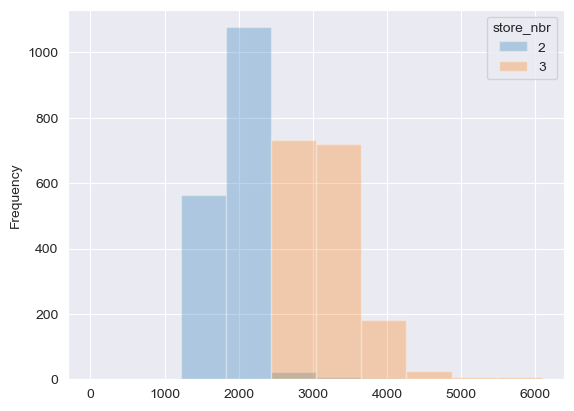

In [43]:
stores_1234_2[[2, 3]].plot.hist(alpha = 0.3)
